In [6]:
# import required library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [7]:
def IQR(name):
    global new_df
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    print(f"Q1  {name}  {Q1}, Q3  {name}  {Q3}")
    print("---------------------------------------")
    iqr = Q3 - Q1
    print(f"IQR for {name} is equal to {iqr}")
    print("---------------------------------------")
    upper_limit = Q1 + 1.5 * iqr
    lower_limit = df[name].quantile(0.15)
    
    return (upper_limit,lower_limit)

In [8]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

In [9]:
def box_plot(name):
    # Create subplots to display multiple box plots side by side
    plt.figure(figsize=(8, 4))

    # Box plot for 'price' column
    sns.boxplot(x=df[name], color='lightblue')
    plt.xlabel(name)
    plt.title(f'Box Plot of {name}')

In [10]:
def boxplot_cat(name):
    fig = plt.figure(figsize=(15,8))
    sns.boxplot(data=df, x=name, y='price')
    plt.xticks(rotation=90)
    plt.show()

In [11]:
# read the data
df = pd.read_csv('train.csv')
df

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290124,359783,7315304329,2007.0,dodge,charger,NaN,NaN,gas,1000.0,clean,automatic,NaN,NaN,NaN,NaN,tx,32.856500,-96.599900,2021-05-01T10:15:37-0500,200
290125,358083,7316875320,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,NaN,NaN,black,tx,32.818710,-96.992283,2021-05-04T14:06:55-0500,8900
290126,152315,7313432323,2013.0,NaN,Scion xB,excellent,4 cylinders,gas,94000.0,clean,automatic,fwd,NaN,wagon,NaN,ia,42.484503,-92.324974,2021-04-27T13:00:51-0500,7300
290127,117952,7316213204,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,NaN,full-size,SUV,red,ga,33.938100,-84.197200,2021-05-03T11:23:11-0400,4500


now we want to discover more information about the data

In [12]:
# shape of data
df.shape

(290129, 20)

In [13]:
# name of the columns 
df.columns

Index(['Unnamed: 0', 'id', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date', 'price'],
      dtype='object')

In [14]:
# Checking total missing values
df.isnull().sum().to_frame()

,0
Unnamed: 0,0
id,0
year,0
manufacturer,11342
model,0
condition,116104
cylinders,119300
fuel,1453
odometer,0
title_status,5066


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

# -------------------------------------------------------------------

## Data Cleaning

# -------------------------------------------------------------------

as we saw in the previous two cells we have a many columns that contain a lots of non-value and that's will effect badlly in our model. so we decide to remove , edit this columns depends on how much null-value they contain

### 1. Drop colunms

here we want to drop some columns and the reason for that the following :

1. `id` and `Unnamed` : in this types of feature we don't need it at all because it's doesn't effect in our model

2. `lat` and `long` : this type of feature contain irrelative feature  .

3. `posting_date` : as we can see in the data all posting_date are in the same year and the month as well so its mean that its **constance** , the second reason this type of features its also irrelative feature .

4. `size` : as we can see in the number of null_value we can see that's more than 80% of the data is null so it'll effects badly to our model so we prefer to delete it.

5. `state` : the city that the car are in their doesn't matter because it doesn't effect in the price of the car


In [16]:
# drop the above feature
df.drop([ 'Unnamed: 0','id', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)
df

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
0,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,sedan,black,7995
1,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,SUV,black,14999
2,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,sedan,NaN,5995
3,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,SUV,NaN,0
4,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,SUV,silver,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290124,2007.0,dodge,charger,NaN,NaN,gas,1000.0,clean,automatic,NaN,NaN,NaN,200
290125,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,NaN,black,8900
290126,2013.0,NaN,Scion xB,excellent,4 cylinders,gas,94000.0,clean,automatic,fwd,wagon,NaN,7300
290127,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,NaN,SUV,red,4500


#                                  *    *   *

### 2. Numerical Data

#    *    *   *

the numerical data here:
##### 1. year
##### 2. odometer
##### 3. price

In [17]:
df.describe()

,year,odometer,price
count,290129.000000,2.901290e+05,2.901290e+05
mean,2011.359082,9.764241e+04,5.193300e+04
std,9.149422,2.058970e+05,9.591680e+06
min,1900.000000,0.000000e+00,0.000000e+00
25%,2008.000000,3.800000e+04,5.991000e+03
50%,2014.000000,8.561500e+04,1.399000e+04
75%,2017.000000,1.334360e+05,2.650000e+04
max,2022.000000,1.000000e+07,3.736929e+09


here we want to create a function for plotting the box plot to get more insight about the outlier

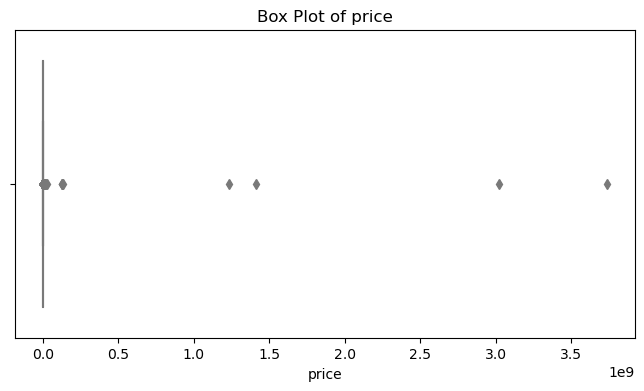

In [18]:
box_plot('price')

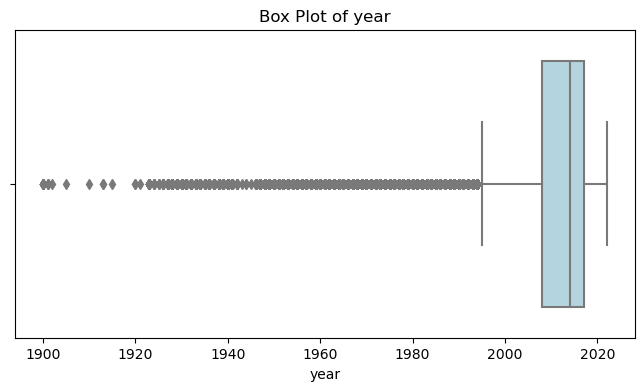

In [19]:
box_plot('year')

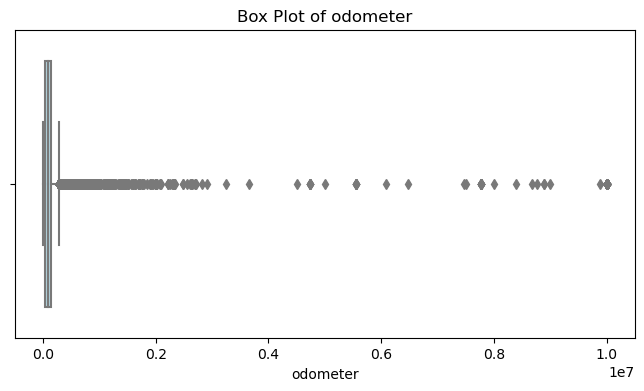

In [20]:
box_plot('odometer')

as we can see they are a lots of outliers in these columns,the Outliers reduces the accuracy of a model. We have to detect outliers and remove them.


now i want to apply the IQR if you want more information about this i recommend the following video that i take the solution from it
> https://www.youtube.com/watch?v=A3gClkblXK8

#### IQR implementation

#### `price`

In [21]:
upper_limit_price,lower_limit_price =IQR('price')

Q1  price  5991.0, Q3  price  26500.0
---------------------------------------
IQR for price is equal to 20509.0
---------------------------------------


In [22]:
df = df[(df['price'] < upper_limit_price) & (df['price'] > 0)]

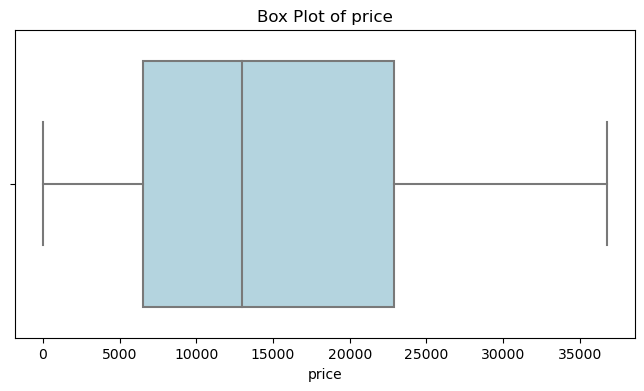

In [23]:
box_plot('price')

as you can see here we solve the outlier in the price column is a great Job :)
now we can say we end the first column

#### `Odometer`

In [24]:
upper_limit_odometer,lower_limit_odometer =IQR('odometer')

Q1  odometer  46000.0, Q3  odometer  140140.0
---------------------------------------
IQR for odometer is equal to 94140.0
---------------------------------------


In [25]:
df = df[(df['odometer'] < upper_limit_odometer) & (df['odometer'] > 0)]

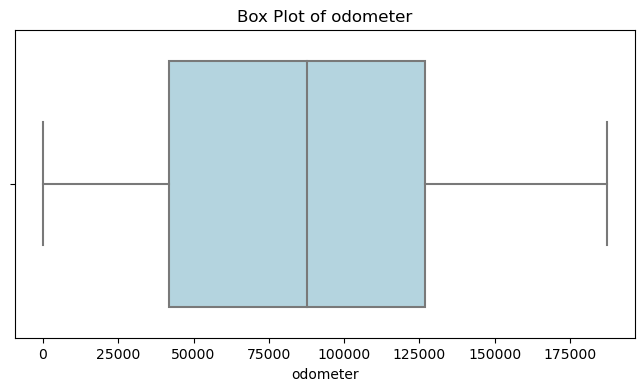

In [26]:
box_plot('odometer')

as you can see here we solve the outlier in the odometer column

#### `year`

In [27]:
# convert the odometer and year from float to integer
df['odometer'] = df['odometer'].astype(int)
df['year'] =  df['year'].astype(int)

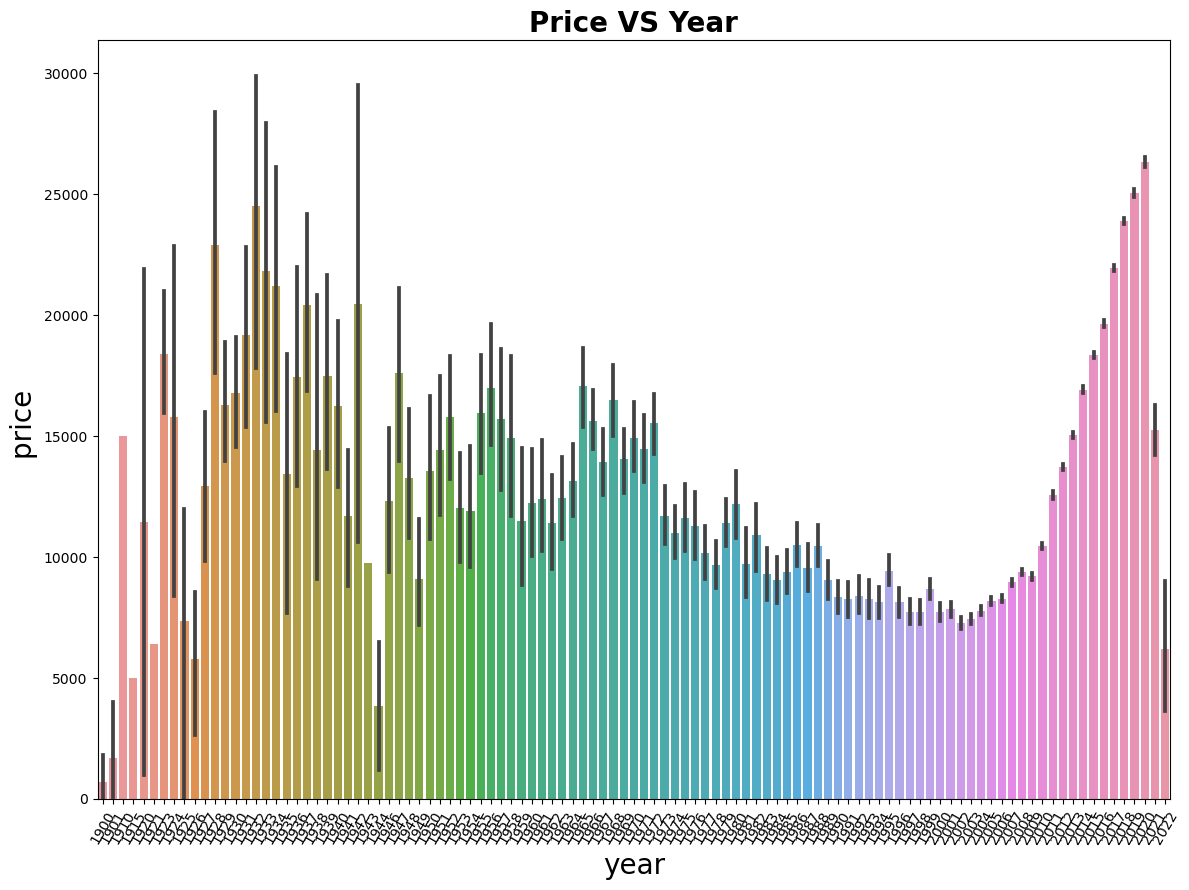

In [28]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y= df['price'],x= df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

We can see the car data before 1996 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996

In [29]:
df["year"].isnull().sum()

0

the null values in a year column cannot be replaced so lets eliminate them

In [30]:
df["year"].min()

1900

In [31]:
df=df.dropna(subset=['year'])

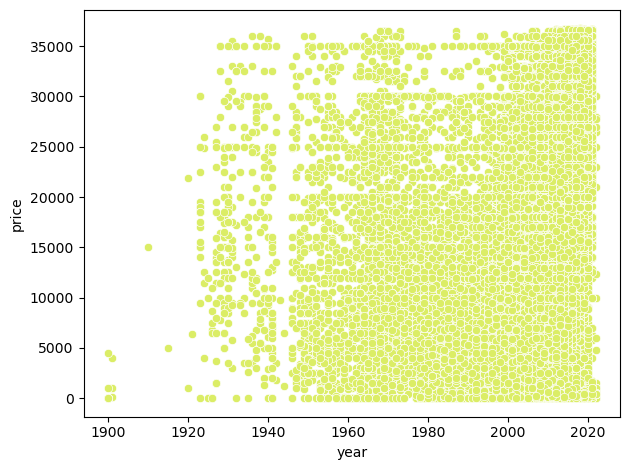

In [32]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [33]:
df = df[df['year'] > 1996]
df.shape

(206877, 13)

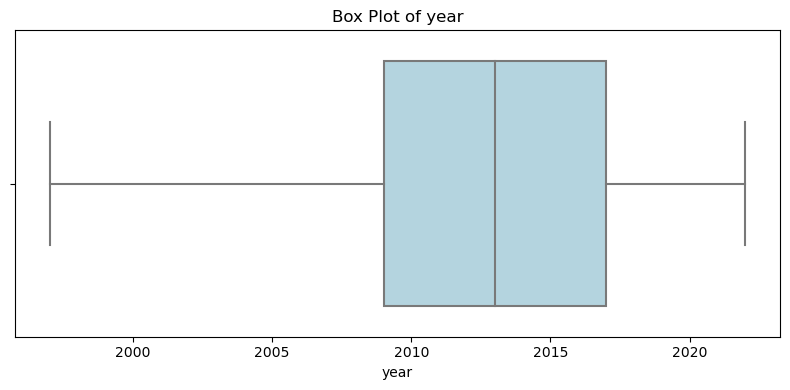

In [34]:
box_plot('year')

as you can see here we solve the outlier in the year column

In [35]:
# df['car_age'] = 2023 - df['year']
# df.drop(['year'], axis = 1, inplace = True)

In [36]:
# df['car_age'].isnull().sum()

now we will see the different before and after edit the outlier

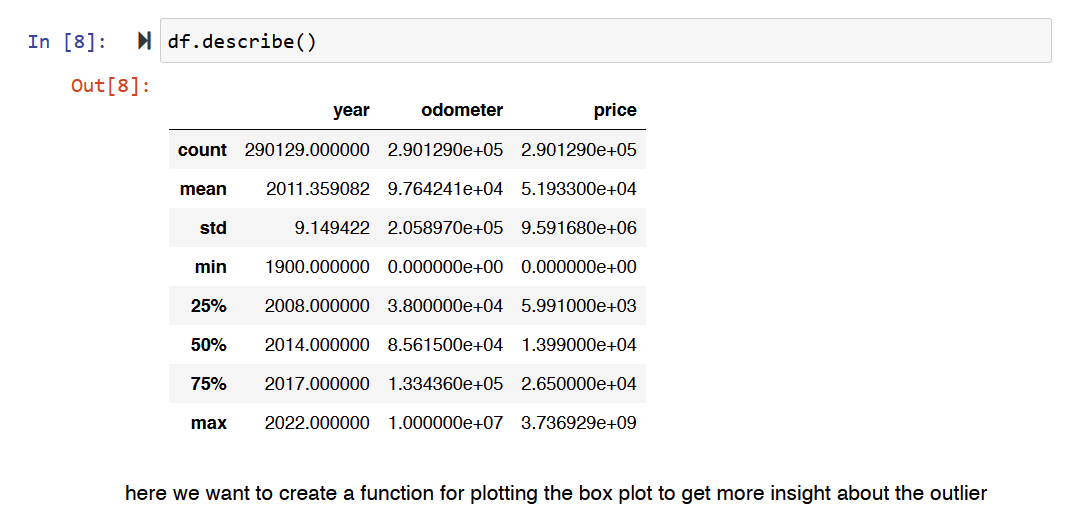

In [37]:
df.describe()

,year,odometer,price
count,206877.000000,206877.000000,206877.000000
mean,2012.570291,87205.845681,15924.160076
std,5.030536,50471.497029,9934.426033
min,1997.000000,1.000000,1.000000
25%,2009.000000,42162.000000,7500.000000
50%,2013.000000,88002.000000,14709.000000
75%,2017.000000,127903.000000,23990.000000
max,2022.000000,187203.000000,36752.000000


#                                  *    *   *

### 3. Categorical data

#    *    *   *

the numerical data here:
##### 1. manufacturer
##### 2. model
##### 3. condition
##### 4. cylinders
##### 5. fuel
##### 6. title_status
##### 7 transmission
##### 8. drive
##### 9. type
##### 10. paint_color

In [38]:
df.describe(include=["object"]).T

,count,unique,top,freq
manufacturer,200849,40,ford,31131
model,206877,16675,f-150,3421
condition,129433,6,good,62557
cylinders,122144,8,6 cylinders,48258
fuel,205661,5,gas,180159
title_status,202744,6,clean,195189
transmission,206877,3,automatic,162799
drive,143521,3,fwd,61023
type,164956,13,sedan,49545
paint_color,146917,12,white,36984


#### ` manufacturer`

In [39]:
# the value counts for manufacturer
mf = df['manufacturer'].value_counts()
mf

ford               31131
chevrolet          24025
toyota             16467
honda              11554
nissan             10663
jeep                9621
bmw                 8266
dodge               7107
gmc                 6862
hyundai             6261
ram                 6255
subaru              5675
volkswagen          5549
mercedes-benz       5450
kia                 4952
lexus               4518
audi                3977
cadillac            3595
chrysler            3553
mazda               3193
acura               3105
buick               3056
infiniti            2711
lincoln             2169
mitsubishi          1962
volvo               1720
mini                1536
pontiac             1033
jaguar               953
rover                807
saturn               632
mercury              576
porsche              544
alfa-romeo           543
fiat                 517
tesla                243
harley-davidson       56
land rover             5
aston-martin           4
ferrari                3


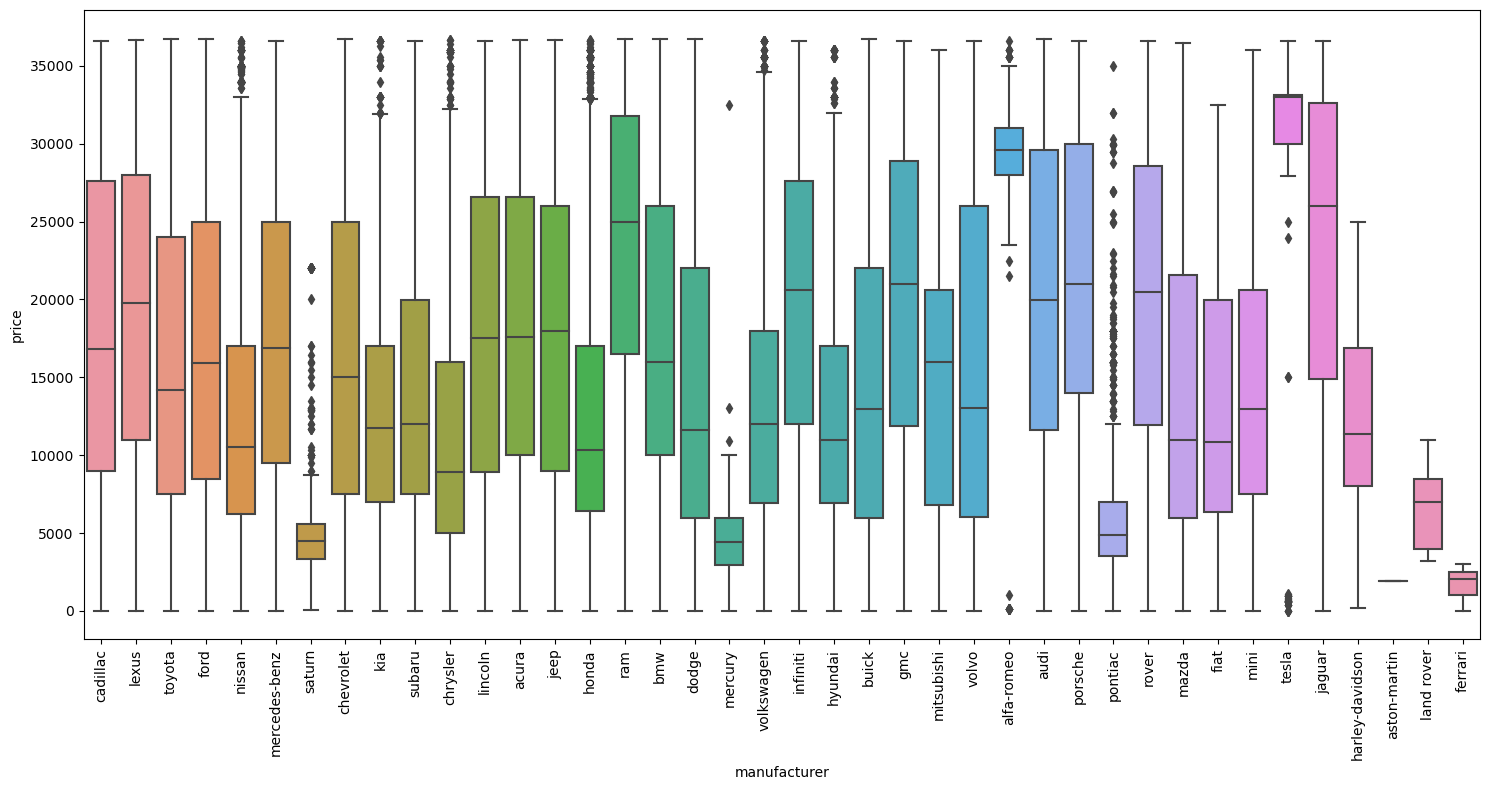

In [40]:
boxplot_cat('manufacturer')

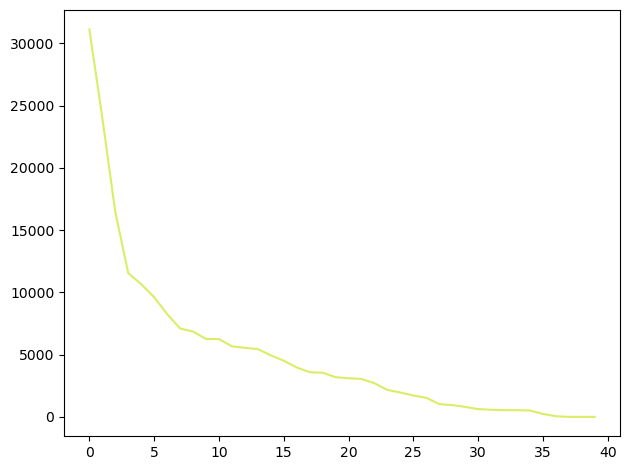

In [41]:
plt.plot(range(len(mf)), mf)

Looking at the count of manufacturers, it is evident that there are a few manufacturers with significantly higher vehicle counts compared to the rest. The top 30 manufacturers account for a large portion of the data, while the remaining manufacturers have relatively smaller counts.

In [42]:
df['manufacturer'] = df['manufacturer'].apply(lambda s: s if str(s) in mf[:20] else 'others')
df['manufacturer']

1         cadillac
2            lexus
4           toyota
5             ford
6           nissan
            ...   
290120      nissan
290124       dodge
290125     hyundai
290126      others
290127        jeep
Name: manufacturer, Length: 206877, dtype: object

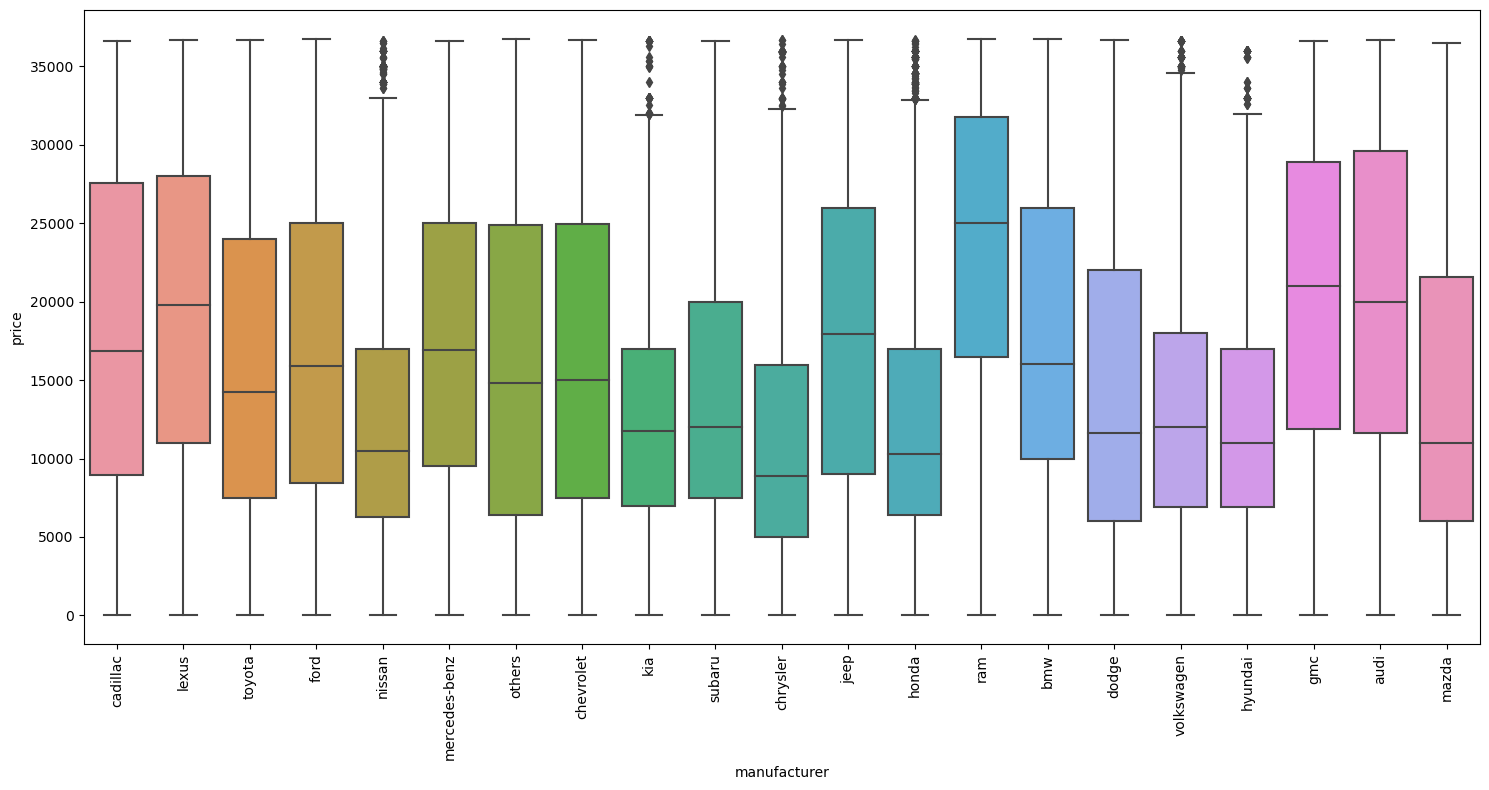

In [43]:
boxplot_cat('manufacturer')

In [44]:
df['manufacturer'].value_counts()

ford             31131
others           28203
chevrolet        24025
toyota           16467
honda            11554
nissan           10663
jeep              9621
bmw               8266
dodge             7107
gmc               6862
hyundai           6261
ram               6255
subaru            5675
volkswagen        5549
mercedes-benz     5450
kia               4952
lexus             4518
audi              3977
cadillac          3595
chrysler          3553
mazda             3193
Name: manufacturer, dtype: int64

as you can see here we solve the outlier in the manufacturer column

#### ` model`

In [45]:
# the value counts for model
md = df['model'].value_counts()
md

f-150                              3421
silverado 1500                     2205
1500                               1901
camry                              1647
escape                             1623
                                   ... 
Nissa Versa Hatchback dark grey       1
v40 wag                               1
passat vr6 4motion                    1
buy here pay here                     1
navigator ultimate                    1
Name: model, Length: 16675, dtype: int64

In [46]:
# i stop it because its a take long time to plot
# boxplot_cat('model')

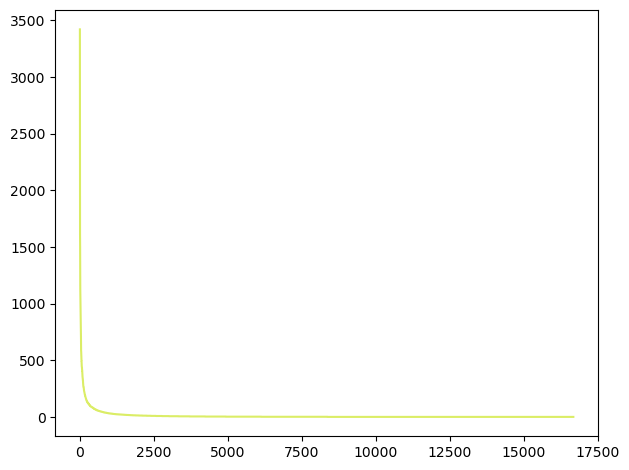

In [47]:
plt.plot(range(len(md)), md)

as we did in the manufacturer column we will apply the same method in this column but here the first 50 

In [48]:
df['model'] = df['model'].apply(lambda s: s if str(s) in md[:50] else 'others')
df['model'].value_counts(), df['model']

(others                155530
 f-150                   3421
 silverado 1500          2205
 1500                    1901
 camry                   1647
 escape                  1623
 accord                  1609
 altima                  1579
 wrangler                1541
 civic                   1502
 explorer                1281
 grand cherokee          1274
 corolla                 1230
 equinox                 1177
 tacoma                  1132
 focus                   1106
 silverado               1069
 fusion                  1067
 cr-v                    1066
 mustang                 1010
 sonata                  1007
 rav4                     979
 malibu                   975
 grand caravan            950
 charger                  930
 impala                   913
 cruze                    891
 outback                  883
 elantra                  869
 jetta                    820
 forester                 814
 edge                     812
 rogue                    790
 prius    

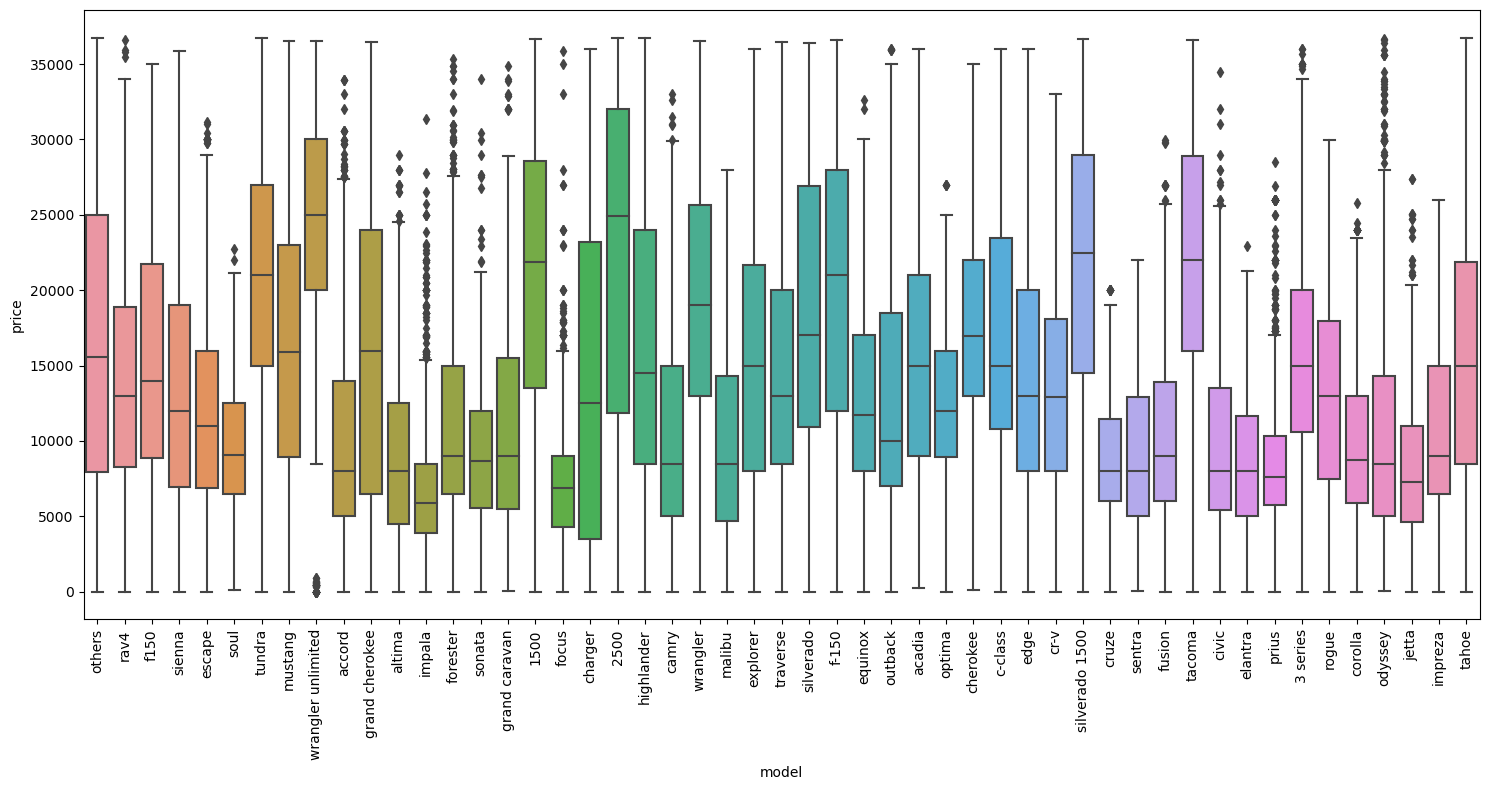

In [49]:
boxplot_cat('model')

as you can see here we solve the outlier in the model column


#### `condition`

the misssing values in the condition can be found using odometer as mileage affects condition of car.

what i am trying to do here is finding mean value of odometer readings grouping by there conditions

here we will use the odometer to fill the condition value
for example
> calculates the mean value of the 'odometer' column for rows where the 'condition' column is equal to 'excellent'


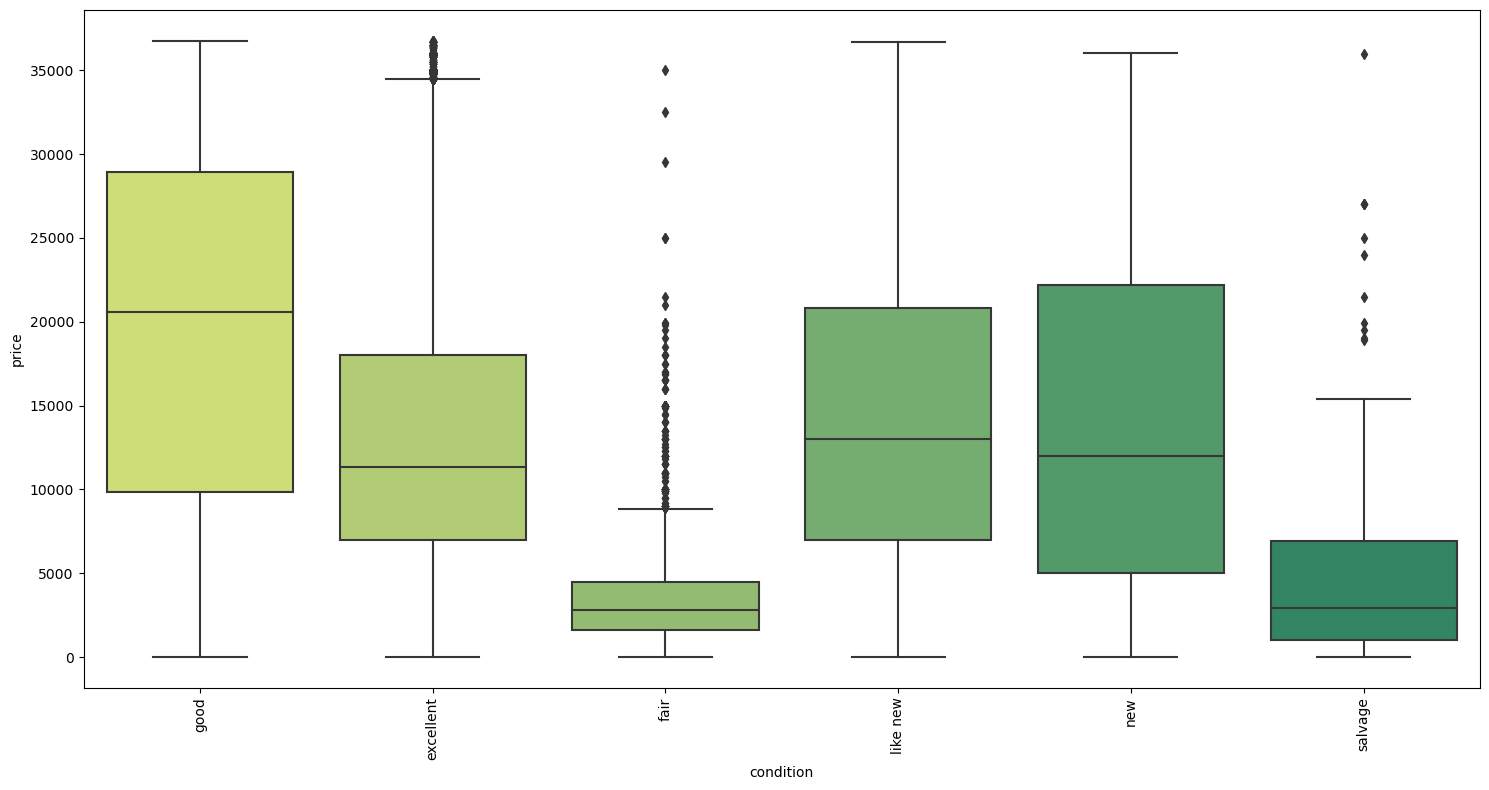

In [50]:
boxplot_cat('condition')

In [51]:
df['condition'].isnull().sum()

77444

In [52]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [53]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 81866.54
Excellent average odometer: 101343.05
Good average odometer: 68227.27
Fair average odometer: 136948.68
Salvage average odometer: 111983.36


these are mean values regarding each condition.

now these can be used to group the odometer readings which have nan values in condition.

In [54]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')


the values are being filled by the values from above calculated mean value ranges


In [55]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [56]:
df['condition'].isnull().sum(),df['condition'].value_counts()

(0,
 excellent    64476
 good         62557
 like new     37911
 fair         18120
 salvage      17839
 new           5974
 Name: condition, dtype: int64)

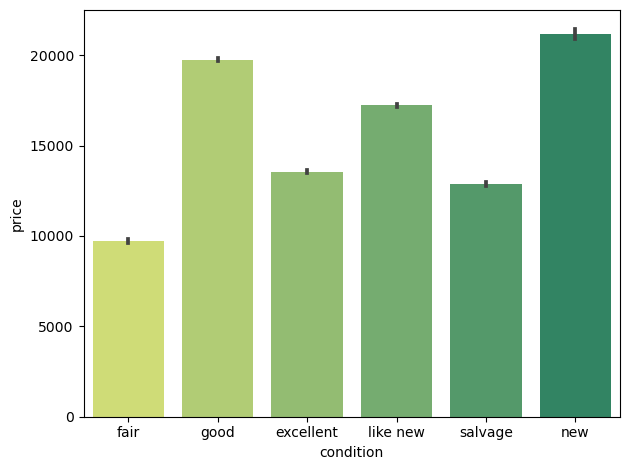

In [57]:
ax = sns.barplot(x="condition", y="price", data=df)

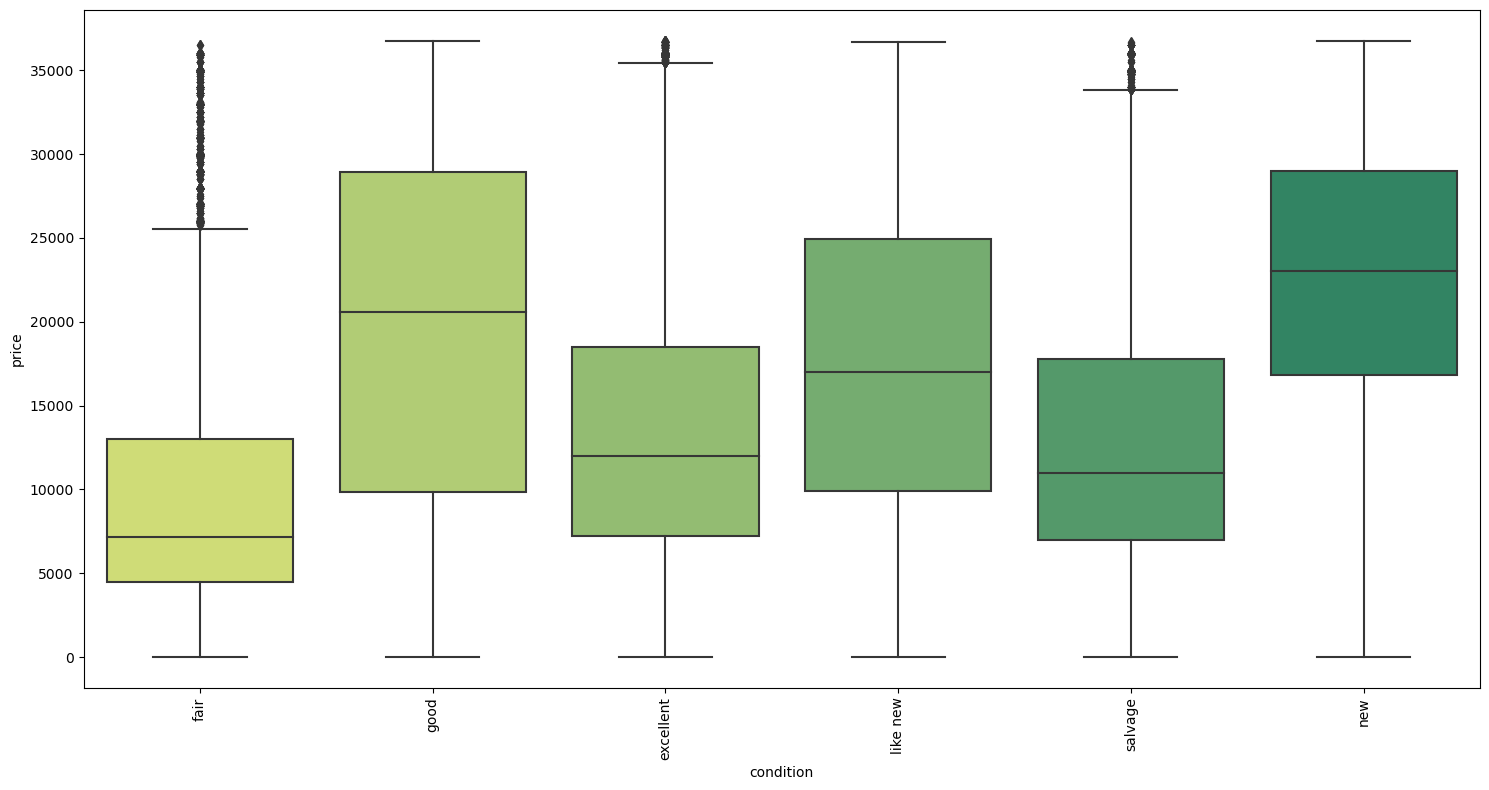

In [58]:
boxplot_cat('condition')

as you can see here we solve the outlier in the manufacturer column

#### `cylinders`

In [59]:
# boxplot_cat('cylinders')

In [60]:
# df['cylinders'].isnull().sum()

In [61]:
# cylinders_values = df['cylinders'].value_counts()
# cylinders_values

In [62]:
# df['cylinders'] = df['cylinders'].apply(lambda x: x if str(x) in cylinders_values[:9] else 'other')

In [63]:
# df['cylinders'].value_counts()


In [64]:
# df['cylinders'].isnull().sum()

In [65]:
# boxplot_cat('cylinders')

#### `fuel`

In [66]:
df['fuel'].isnull().sum()

1216

In [67]:
fuel_values = df['fuel'].value_counts()
fuel_values

gas         180159
other        15143
diesel        6577
hybrid        2982
electric       800
Name: fuel, dtype: int64

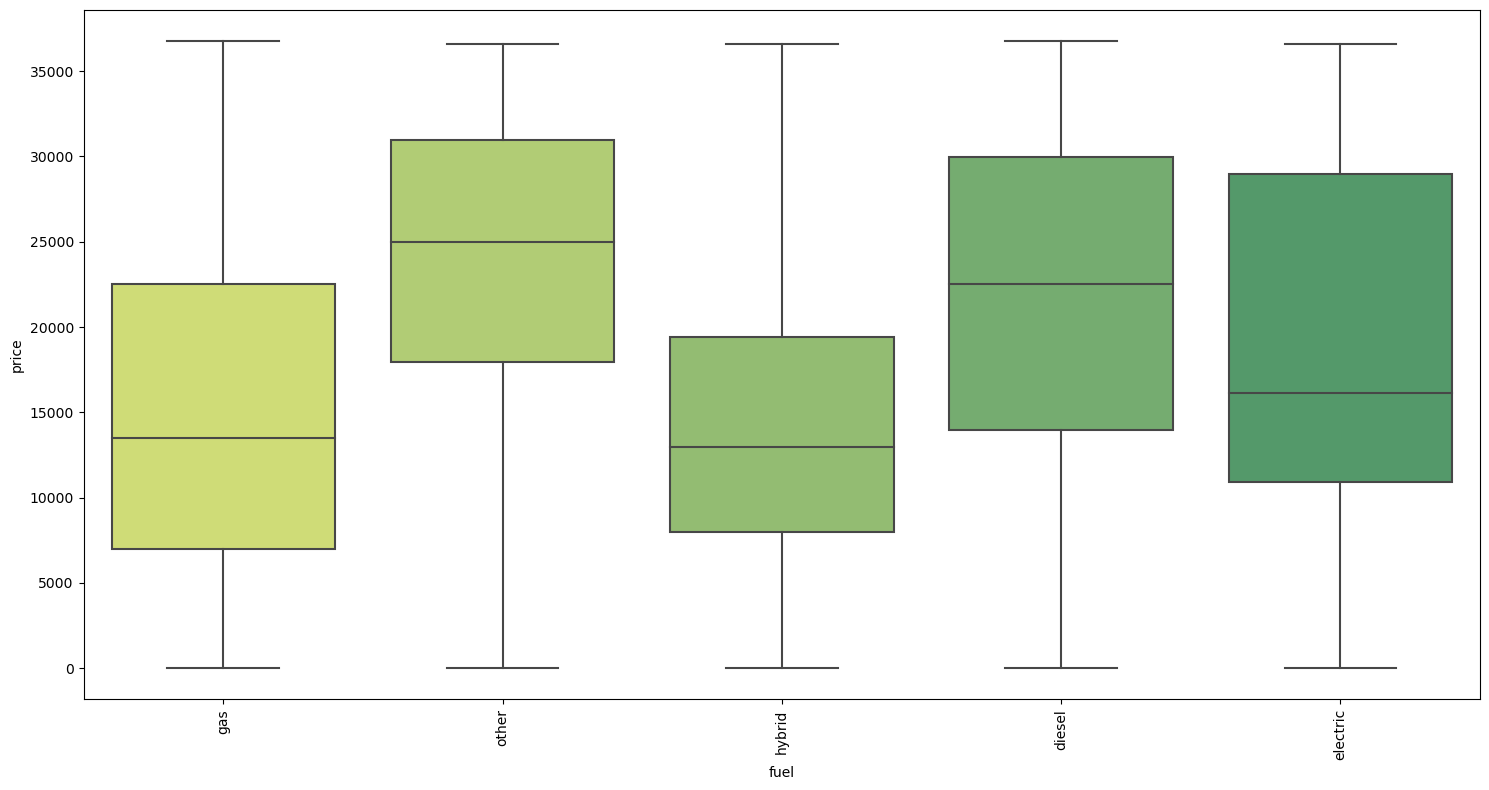

In [68]:
boxplot_cat('fuel')

In [69]:
df['fuel'] = df['fuel'].apply(lambda x: x if str(x) in fuel_values[:6] else 'other')

In [70]:
df['fuel'].value_counts()

gas         180159
other        16359
diesel        6577
hybrid        2982
electric       800
Name: fuel, dtype: int64

In [71]:
df['fuel'].isnull().sum()

0

### ` size` & `transmission` & `title_status` 
will drop all of them

In [72]:
df=df.drop(["transmission" , "title_status"],axis=1)
df

,year,manufacturer,model,condition,cylinders,fuel,odometer,drive,type,paint_color,price
1,2008,cadillac,others,fair,NaN,gas,170276,NaN,SUV,black,14999
2,2003,lexus,others,fair,NaN,gas,176910,fwd,sedan,NaN,5995
4,2008,toyota,rav4,good,6 cylinders,gas,138900,4wd,SUV,silver,7995
5,2010,ford,f150,excellent,8 cylinders,gas,156700,4wd,NaN,NaN,18300
6,2015,nissan,others,excellent,6 cylinders,gas,67351,4wd,SUV,NaN,15919
...,...,...,...,...,...,...,...,...,...,...,...
290120,2019,nissan,others,new,6 cylinders,gas,39,4wd,truck,white,25550
290124,2007,dodge,charger,like new,NaN,gas,1000,NaN,NaN,NaN,200
290125,2013,hyundai,others,good,4 cylinders,gas,114000,4wd,NaN,black,8900
290126,2013,others,others,excellent,4 cylinders,gas,94000,fwd,wagon,NaN,7300


#### `paint_color`

In [73]:
df['paint_color'].isnull().sum(),df['paint_color'].value_counts()

(59960,
 white     36984
 black     31199
 silver    23071
 blue      16031
 red       14806
 grey      12939
 custom     3361
 green      3209
 brown      3147
 orange      953
 yellow      913
 purple      304
 Name: paint_color, dtype: int64)

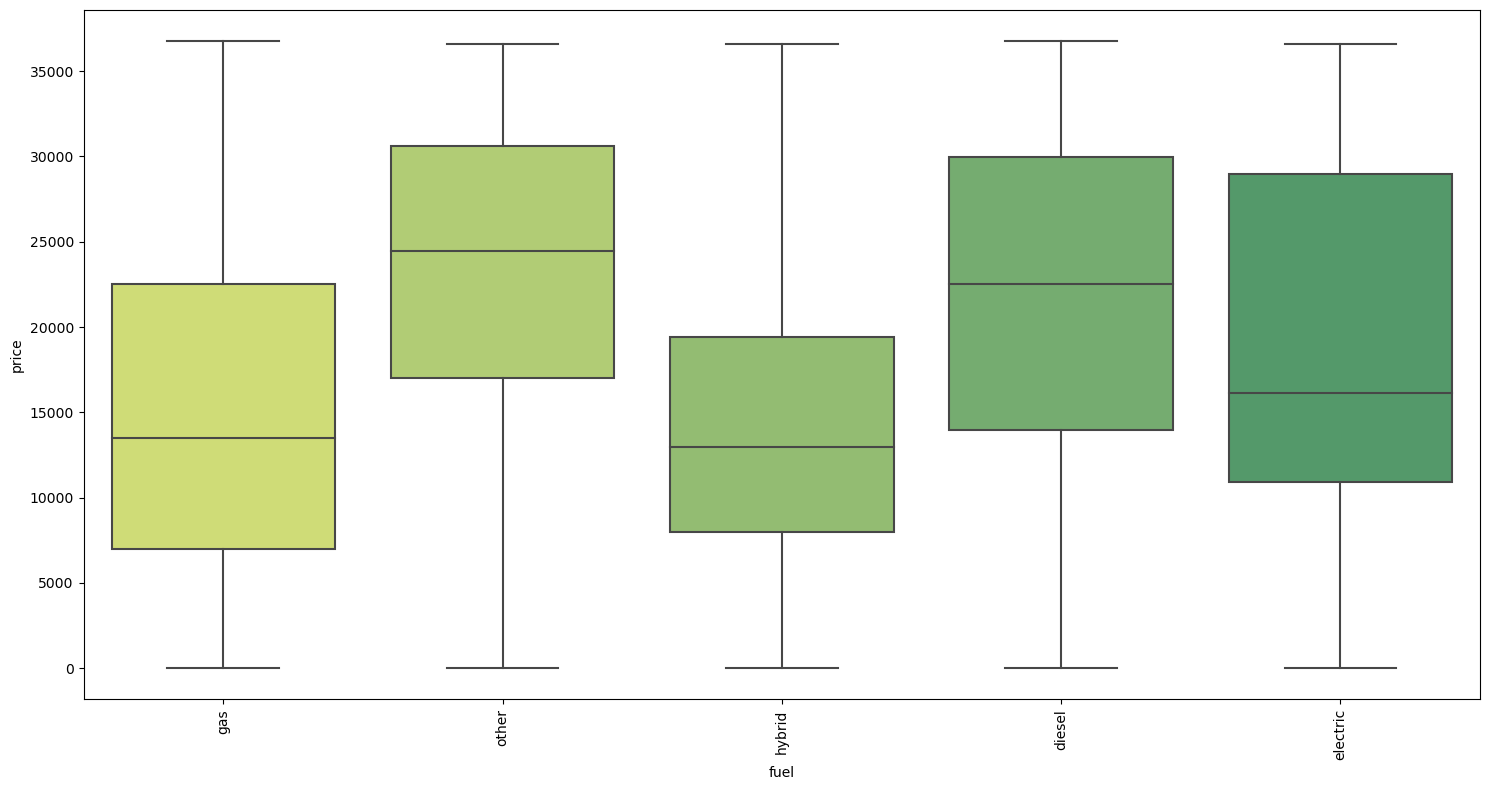

In [74]:
boxplot_cat('fuel')

In [75]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')

In [76]:
df['paint_color'].isnull().sum(),df['paint_color'].value_counts()

(0,
 white     52138
 black     43899
 silver    32521
 blue      22591
 red       20908
 grey      18140
 custom     4730
 green      4519
 brown      4405
 orange     1348
 yellow     1251
 purple      427
 Name: paint_color, dtype: int64)

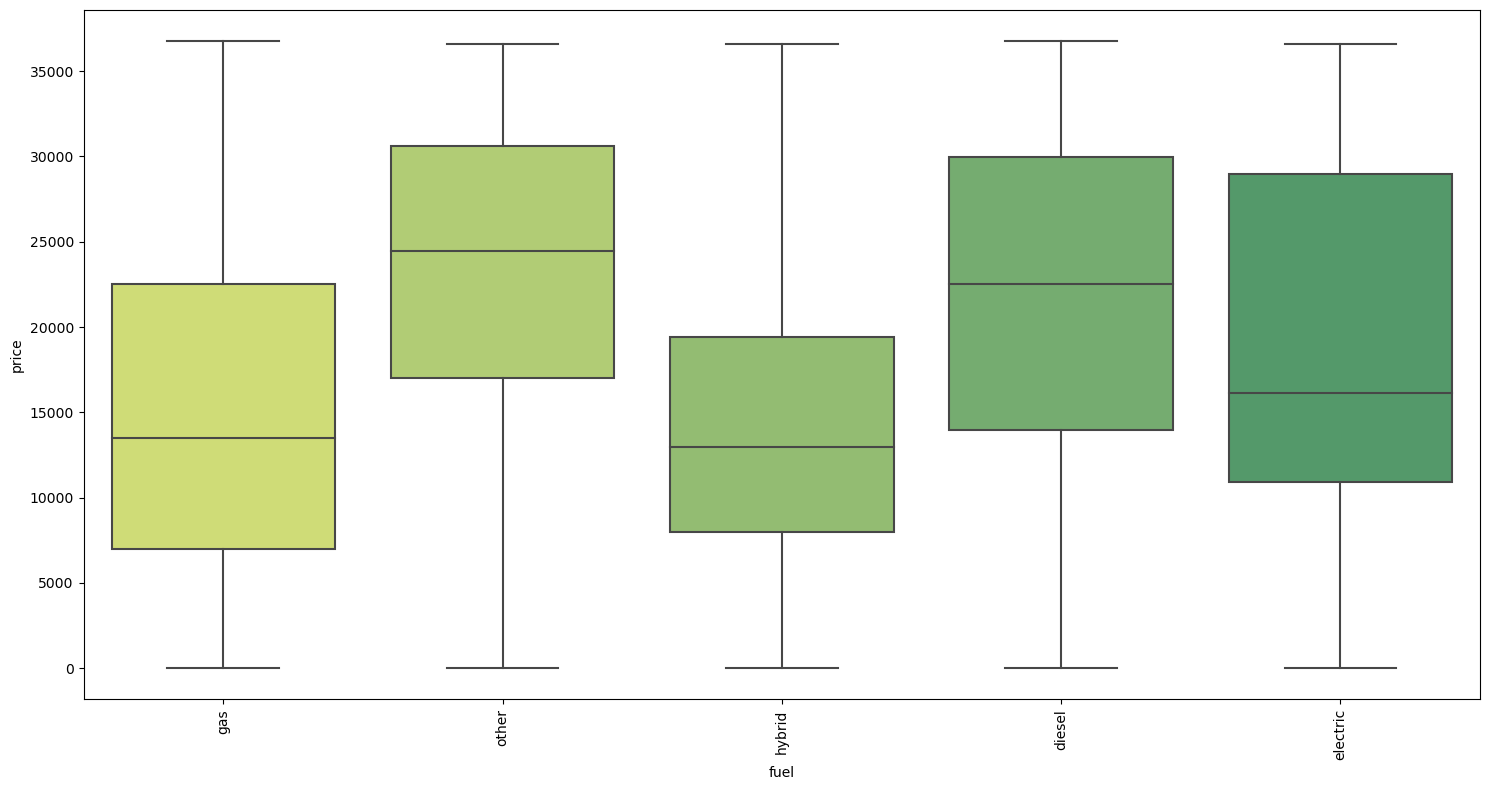

In [77]:
boxplot_cat('fuel')

#### `drive`

In [78]:
df['drive'].isnull().sum(),df['drive'].value_counts()

(63356,
 fwd    61023
 4wd    56944
 rwd    25554
 Name: drive, dtype: int64)

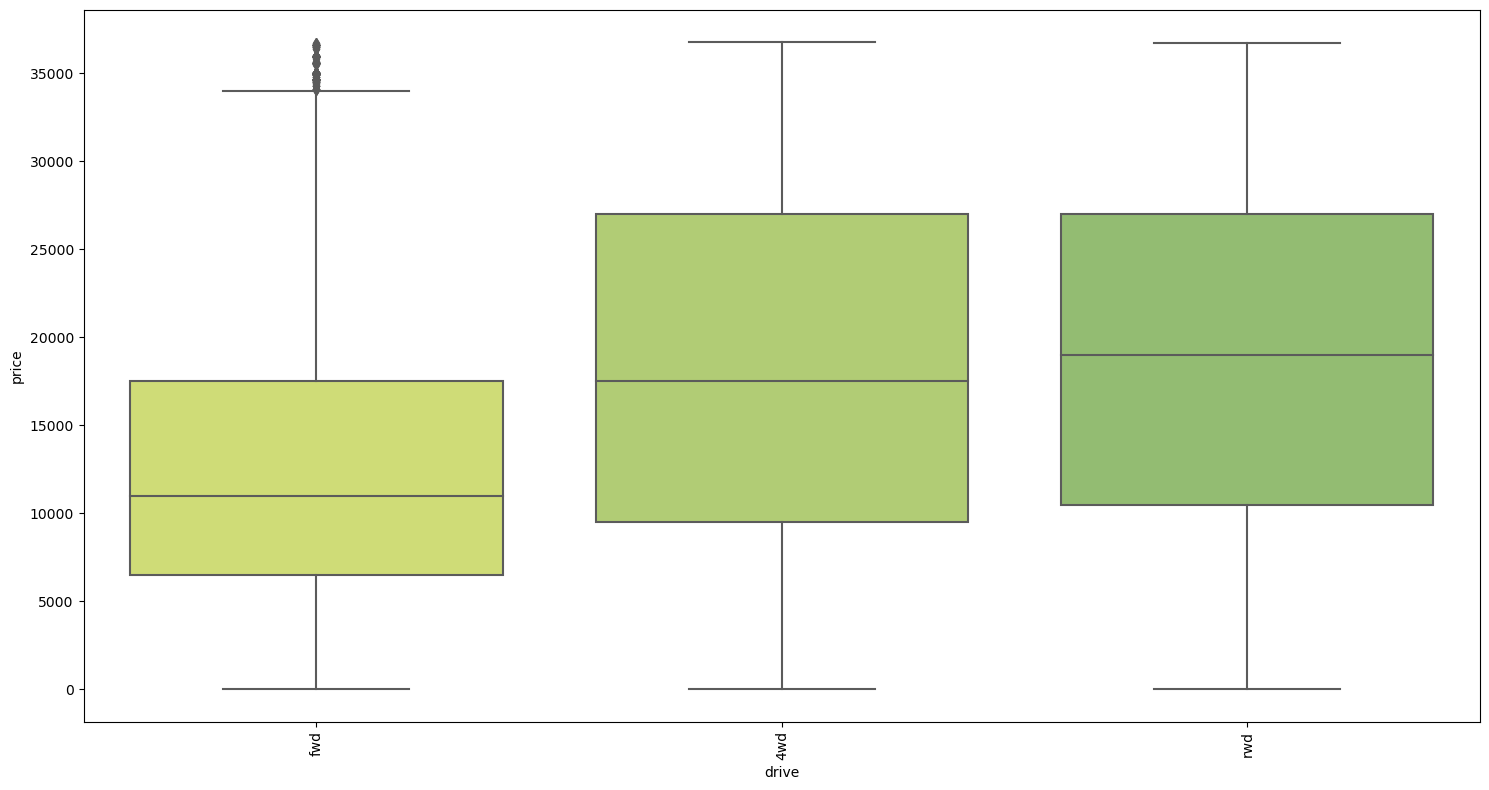

In [79]:
boxplot_cat('drive')

In [80]:
df['drive'] = df['drive'].fillna(method='ffill')

In [81]:
df['drive'].isnull().sum(),df['drive'].value_counts()

(1,
 fwd    87800
 4wd    82294
 rwd    36782
 Name: drive, dtype: int64)

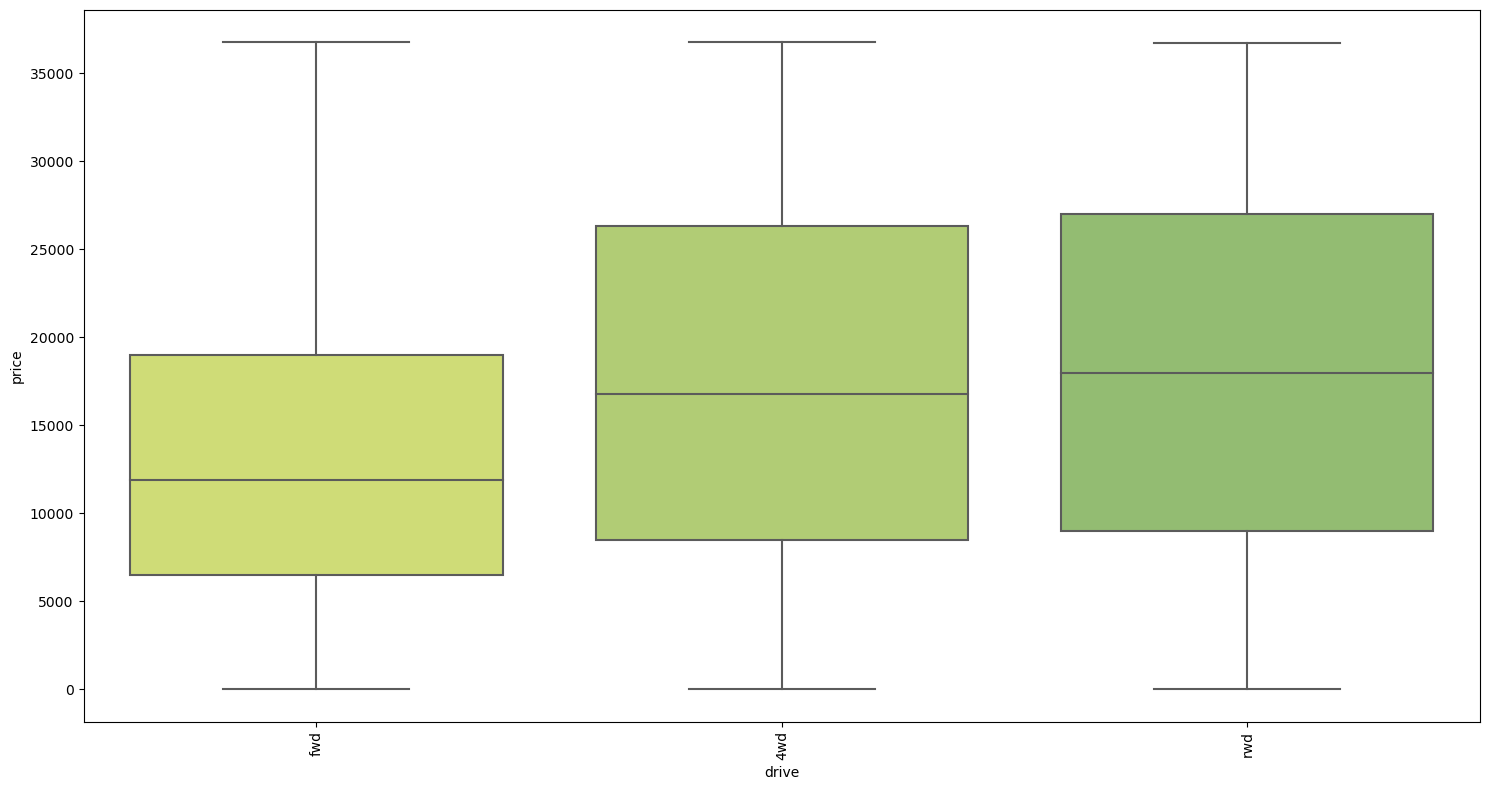

In [82]:
boxplot_cat('drive')

#### `cylinders`

In [83]:
df['cylinders'].isnull().sum(),df['cylinders'].value_counts()

(84733,
 6 cylinders     48258
 4 cylinders     45218
 8 cylinders     26183
 5 cylinders       997
 10 cylinders      695
 other             411
 3 cylinders       328
 12 cylinders       54
 Name: cylinders, dtype: int64)

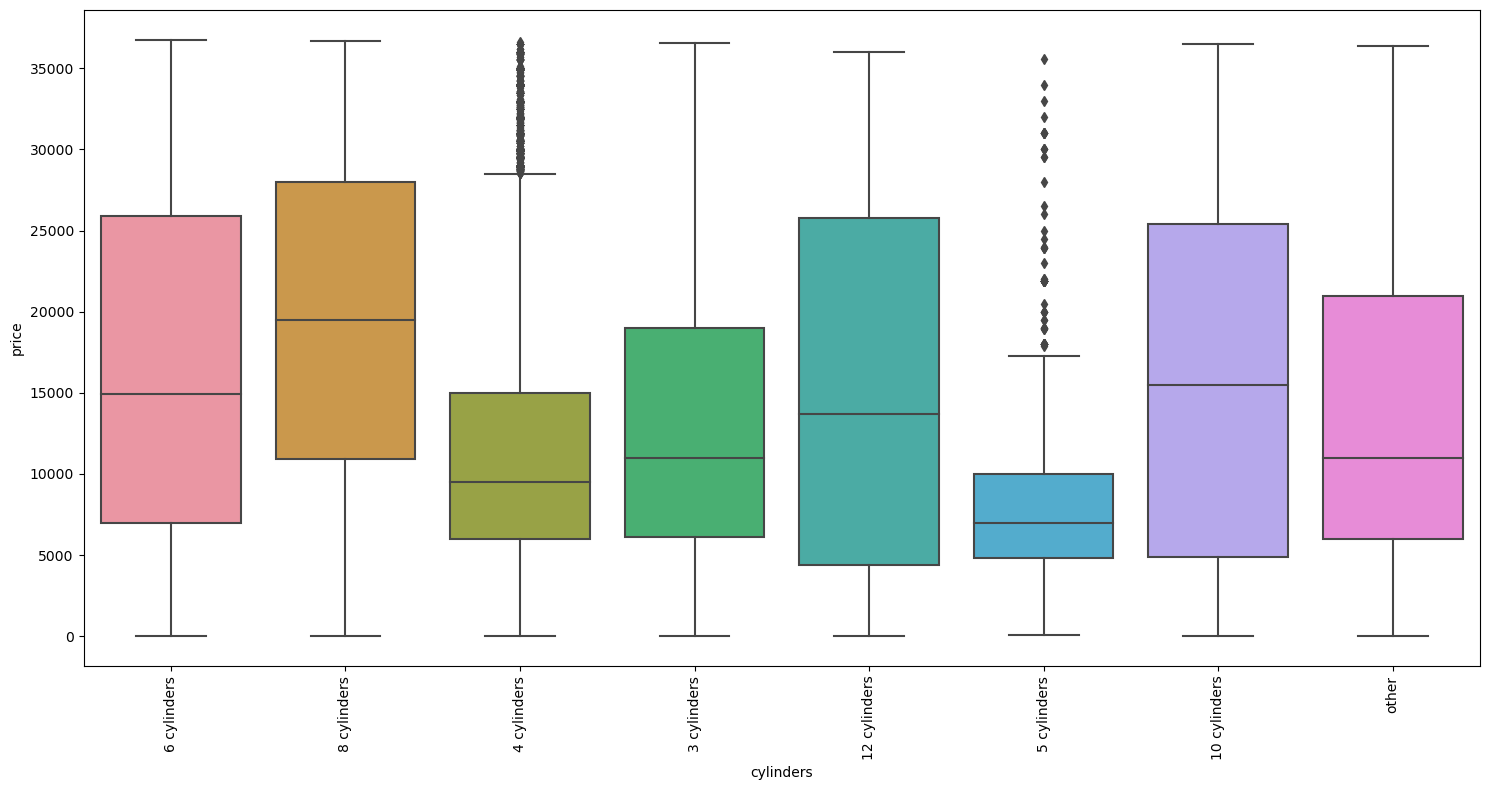

In [84]:
boxplot_cat('cylinders')

In [85]:
df['cylinders'] = df['cylinders'].fillna(method='ffill')

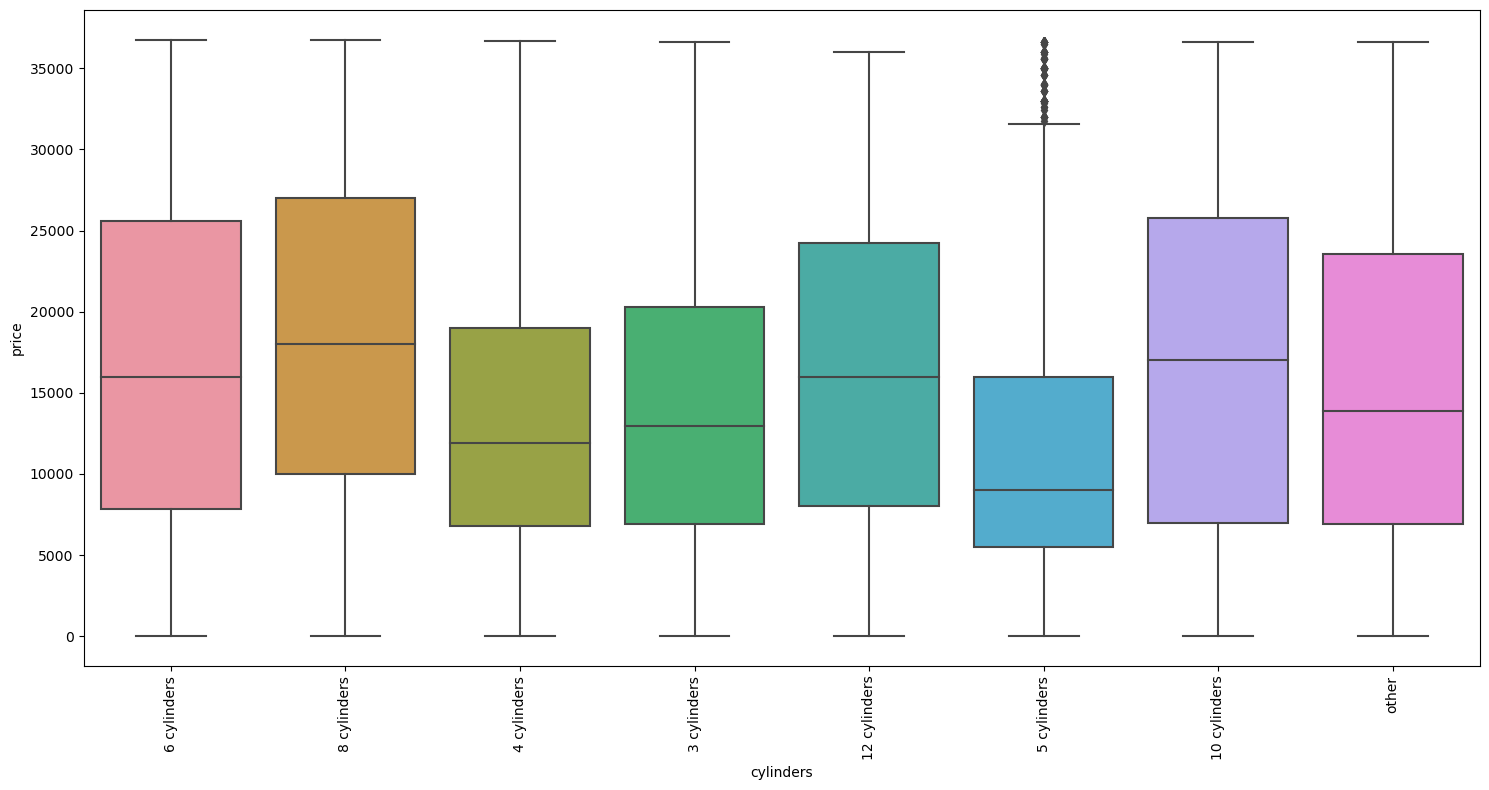

In [86]:
boxplot_cat('cylinders')

In [87]:
df['cylinders'].isnull().sum(),df['cylinders'].value_counts()

(2,
 6 cylinders     81514
 4 cylinders     76573
 8 cylinders     44610
 5 cylinders      1660
 10 cylinders     1195
 other             705
 3 cylinders       525
 12 cylinders       93
 Name: cylinders, dtype: int64)

In [88]:
df=df.dropna(subset=['cylinders','drive'])

#### `type`

In [89]:
df['type'].isnull().sum(),df['type'].value_counts()

(41921,
 sedan          49544
 SUV            39727
 pickup         18136
 truck          11631
 hatchback      10333
 other           9924
 coupe           8524
 wagon           6320
 van             4353
 convertible     3474
 mini-van        2563
 bus              213
 offroad          212
 Name: type, dtype: int64)

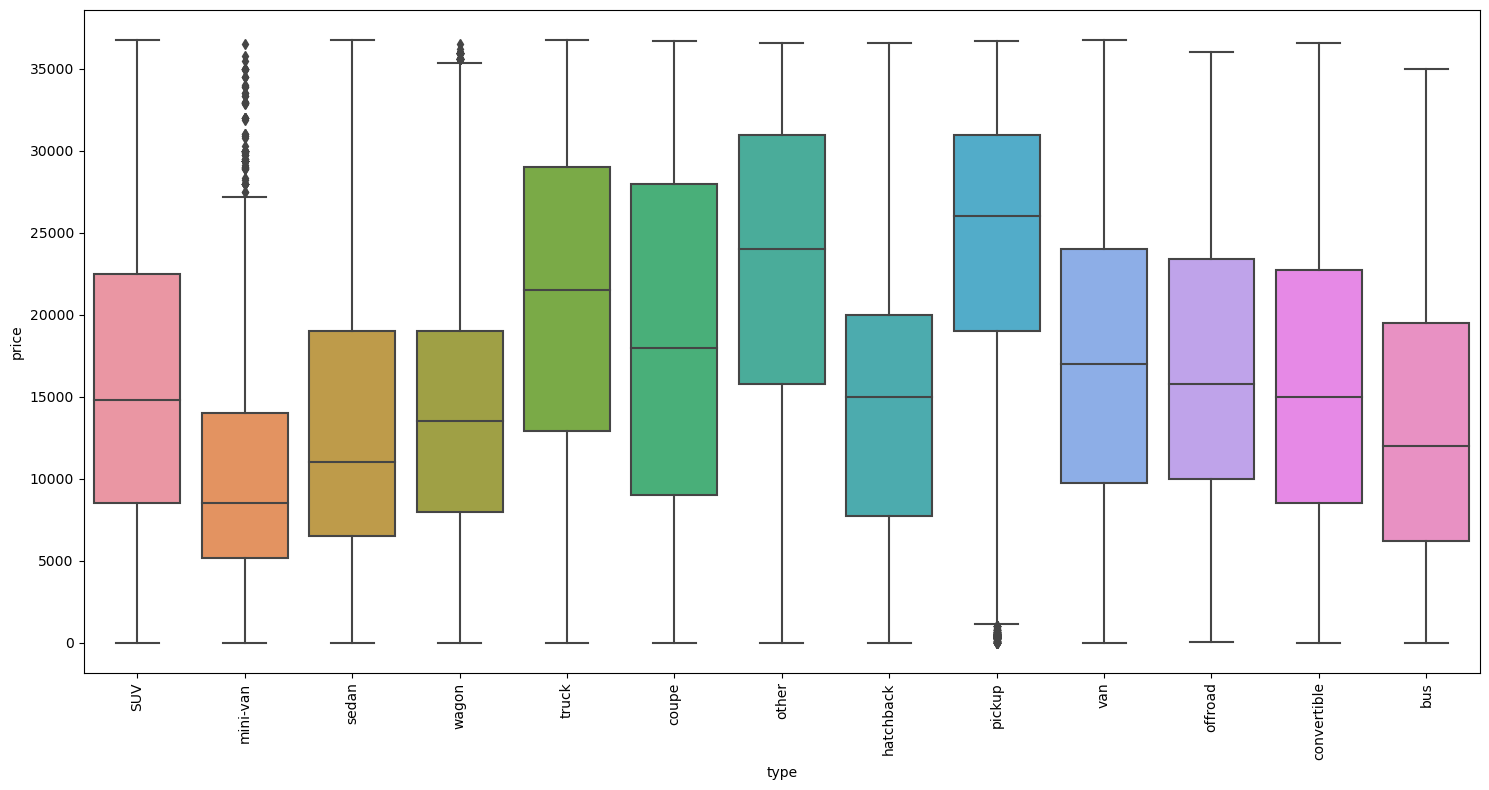

In [90]:
boxplot_cat('type')

In [91]:
df['type'] = df['type'].fillna(method='ffill')

C:\Users\emana\AppData\Local\Temp\ipykernel_40000\869142668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].fillna(method='ffill')


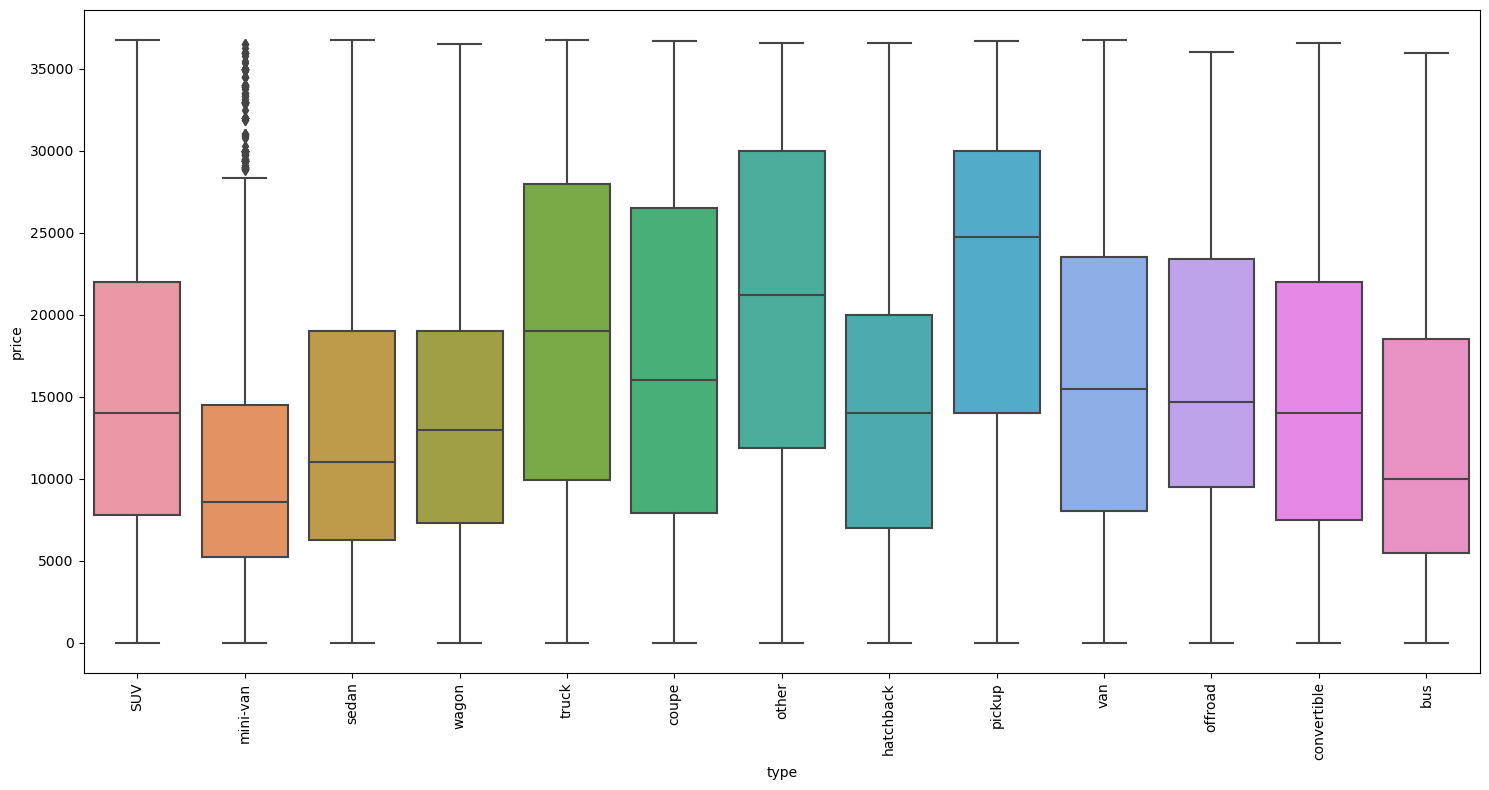

In [92]:
boxplot_cat('type')

In [93]:
df['cylinders'].isnull().sum(),df['cylinders'].value_counts()

(0,
 6 cylinders     81514
 4 cylinders     76573
 8 cylinders     44610
 5 cylinders      1660
 10 cylinders     1195
 other             705
 3 cylinders       525
 12 cylinders       93
 Name: cylinders, dtype: int64)

# --------------------------------------------------------------------
## the end 
# --------------------------------------------------------------------


In [94]:
df.isnull().sum()

year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
drive           0
type            0
paint_color     0
price           0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206875 entries, 4 to 290127
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          206875 non-null  int32 
 1   manufacturer  206875 non-null  object
 2   model         206875 non-null  object
 3   condition     206875 non-null  object
 4   cylinders     206875 non-null  object
 5   fuel          206875 non-null  object
 6   odometer      206875 non-null  int32 
 7   drive         206875 non-null  object
 8   type          206875 non-null  object
 9   paint_color   206875 non-null  object
 10  price         206875 non-null  int64 
dtypes: int32(2), int64(1), object(8)
memory usage: 17.4+ MB



### Exploratory Data Analysis


In [96]:
from scipy import stats

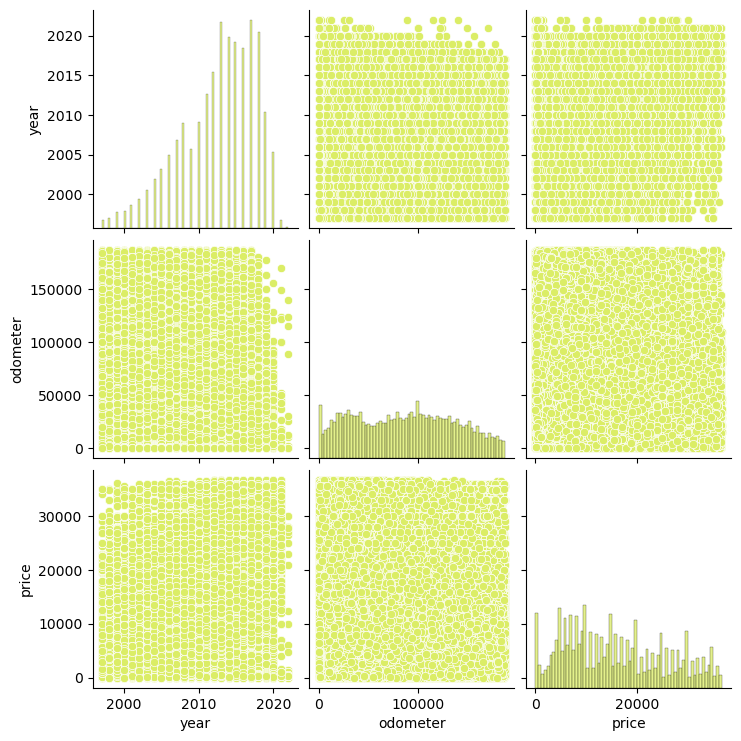

In [97]:
sns.pairplot(df)

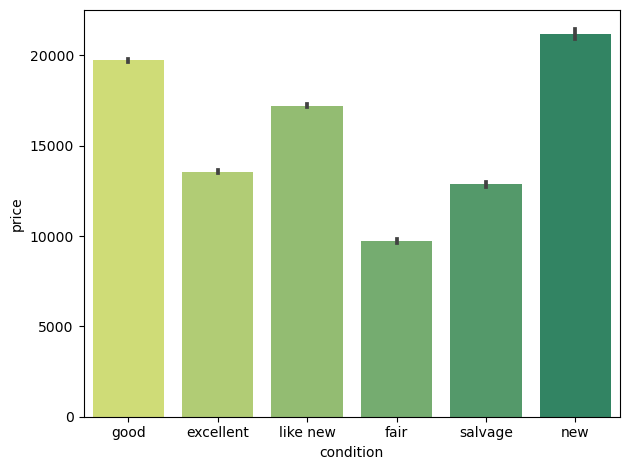

In [98]:
ax = sns.barplot(x="condition", y="price", data=df)

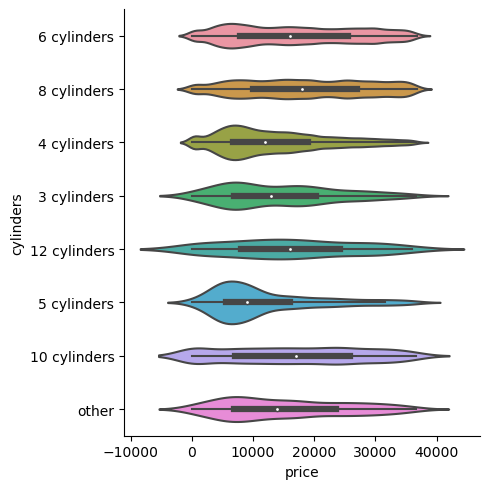

In [99]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

This violinplot provides clear idea about the distribution of number of cylinders and the price.

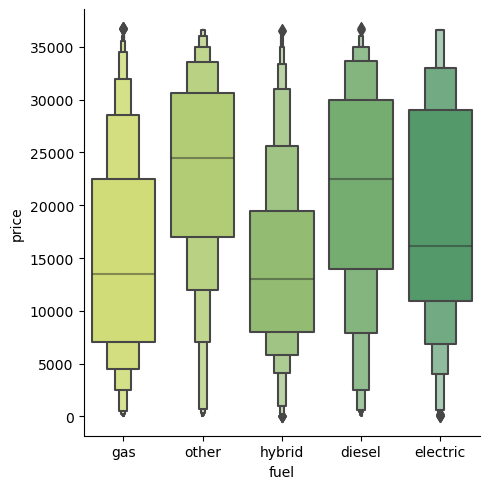

In [100]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

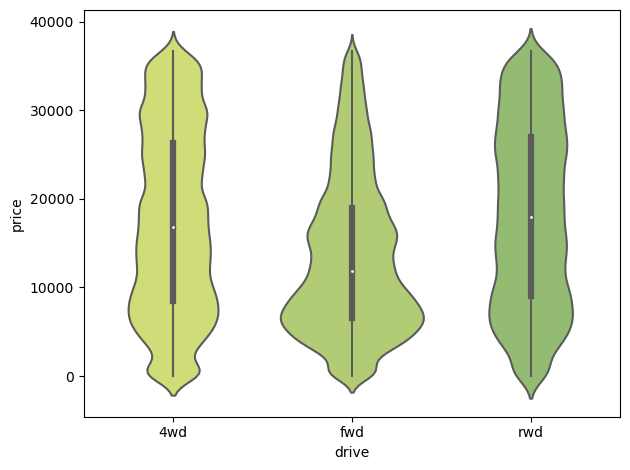

In [101]:
sns.violinplot(x=df.drive, y=df.price);

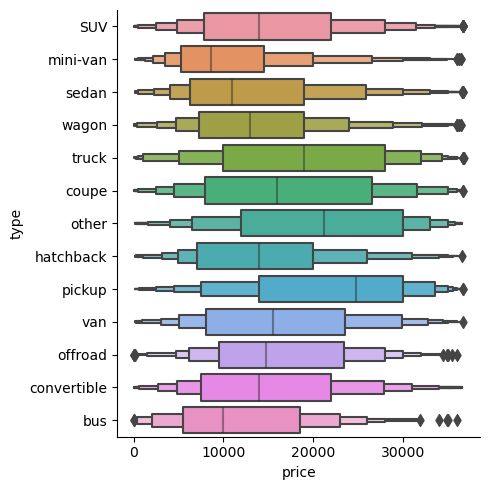

In [102]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

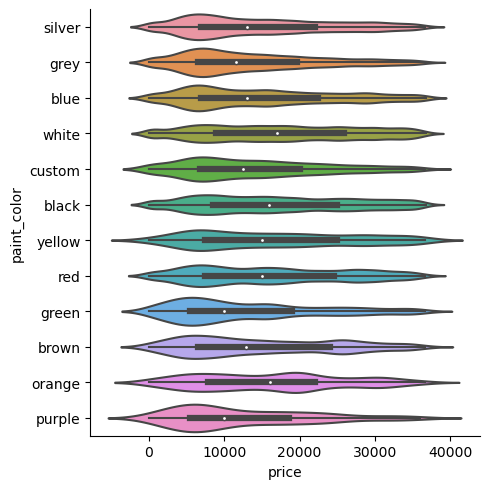

In [103]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

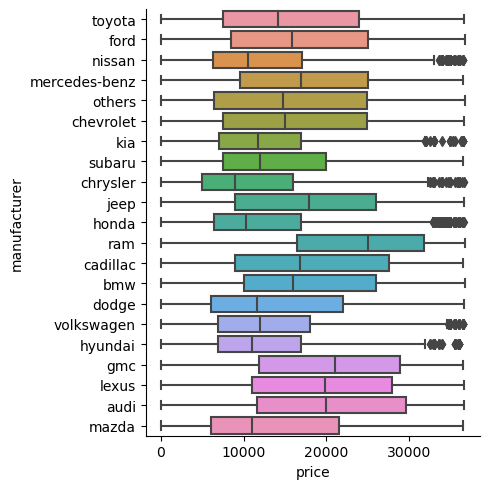

In [104]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

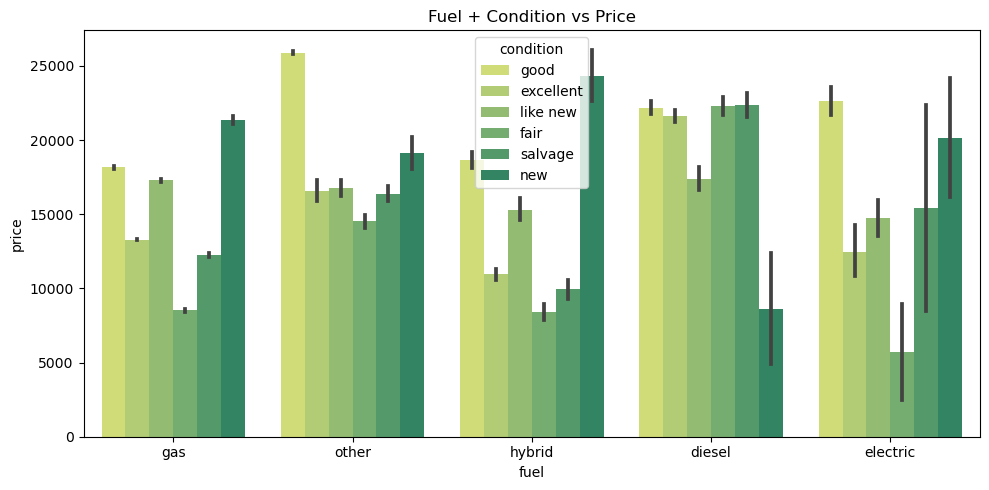

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=df)
plt.title('Fuel + Condition vs Price')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

# --------------------------------------------------------------------
###  Label Processing
# --------------------------------------------------------------------


In [106]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [107]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel',
       'drive', 'type', 'paint_color']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel',
       'drive', 'type', 'paint_color']].apply(le.fit_transform)

C:\Users\emana\AppData\Local\Temp\ipykernel_40000\737875553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['manufacturer', 'model', 'condition',


In [108]:
df

,year,manufacturer,model,condition,cylinders,fuel,odometer,drive,type,paint_color,price
4,2008,19,37,2,5,2,138900,0,0,9,7995
5,2010,6,20,0,6,2,156700,0,0,9,18300
6,2015,15,34,0,5,2,67351,0,0,9,15919
7,2016,6,34,3,5,2,37000,0,0,9,24695
8,2012,19,40,1,5,2,157653,0,5,5,11995
...,...,...,...,...,...,...,...,...,...,...,...
290120,2019,15,34,4,5,2,39,0,10,10,25550
290124,2007,5,8,3,5,2,1000,0,10,10,200
290125,2013,9,34,2,3,2,114000,0,10,0,8900
290126,2013,16,34,0,3,2,94000,1,12,0,7300


# split train and validation data

In [122]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostRegressor


In [110]:
y= df.price
X= df.drop('price',axis=1)
X.shape, y.shape

((206875, 10), (206875,))

In [111]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)

(165500, 10) (165500,)
(41375, 10) (41375,)


# -----------------------------------------------------------------
## Training Model
# -----------------------------------------------------------------


### ` Random Forest`

In [124]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [113]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)

In [116]:
R2_score = r2_score(y_val, y_pred)*100
score_rfr = result(y_val, y_pred)
score_data['Linear Regression'] = score_rfr
print('R2_score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2_score:  0.7568
Mean squared error:  24015199.69
Mean absolute error:  2890.17
Root mean squared error:  4900.53


### `K-Nearest Neighbour`


In [120]:
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)

In [121]:
score_knn = result(y_val, y_pred)
score_data['K-Nearest Neighbour'] = score_knn
print('R2 score: ', score_knn[0])
print('Mean squared error: ', score_knn[2])
print('Mean absolute error: ', score_knn[3])
print('Root mean squared error: ', score_knn[4])

R2 score:  0.5321
Mean squared error:  46203159.83
Mean absolute error:  4497.57
Root mean squared error:  6797.29


### `AdaBoost Regressor `

In [126]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.1)
ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_val)

In [127]:
score_abr = result(y_val, y_pred)
score_data['AdaBoost Regressor'] = score_abr
print('R2 score: ', score_abr[0])
print('Mean squared error: ', score_abr[2])
print('Mean absolute error: ', score_abr[3])
print('Root mean squared error: ', score_abr[4])

R2 score:  0.7790
Mean squared error:  21820310.50
Mean absolute error:  2463.64
Root mean squared error:  4671.22


# show the results

In [128]:
score_data

,Linear Regression,K-Nearest Neighbour,AdaBoost Regressor
R2 Score,0.7568,0.5321,0.7790
Accuracy(%),75.6790,53.2085,77.9018
Mean Squared Error,24015199.69,46203159.83,21820310.50
Mean Absolute Error,2890.17,4497.57,2463.64
Root MSE,4900.53,6797.29,4671.22
